Creating Diagonal Banded Natrix to Solve System of Equation. The banded-matrix will have at most 5 non-zero entries, therefore it is called the penta-diagonal.

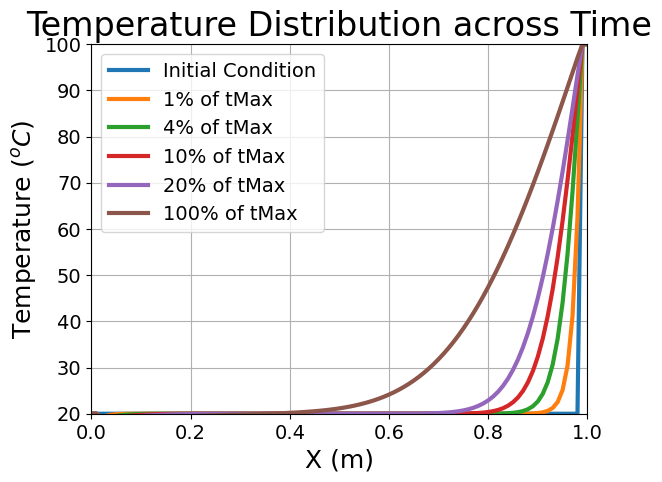

In [7]:
# Practicing the 1D heat equation with fourth-order approximation for the spatial derivative using explicit method
# using the same input with the previous example
# This practice is part of lecture from Sebastian Thomas - An Intro to Computational Fluid Dynamics

import numpy as np
import matplotlib.pyplot as plt

# We define the constants first - same as the previous example
T1 = 20
Tmax = 100
numX = 101
x = np.linspace(0,1,numX)
y = np.ones(x.shape)*T1
y[0] = T1
y[1] = T1
y[-2] = Tmax
y[-1] = Tmax
alpha = 0.2
deltaT = 0.1
C = alpha*deltaT/(12*(deltaT)**2)
time = 0
time_max = 10
count = 0
plt.plot(x,y,'-', label='Initial Condition',linewidth=3)
numTimeSteps = (np.rint(time_max/deltaT)).astype(int)
pausePercentages = np.array([1,4,10,20,100])
pauseTimeSteps = np.rint(numTimeSteps*0.01*pausePercentages).astype(int)

dg = [] # Prealocating matrix to store the values for solving system of linear equation
dg = np.empty(shape=(numX-4, numX-4)) # Create the penta-diagonal matrix with the size of numX-4, since we have 2 BCs on both ends
dg.fill(0)
for idx in range(0, numX-4):
    dg[idx][idx] = 1+30*C
    if idx+2 <= numX-5:
        dg[idx][idx+2] = C
    if idx+1 <= numX-5:
        dg[idx][idx+1] = -16*C
    if idx-1 >= 0:
        dg[idx][idx-1] = -16*C
    if idx-2 >= 0:
        dg[idx][idx-2] = C
b = np.zeros(shape=(numX-4,1)) # Create zero entry matrix to store the known variables

# We iterate from t=0 to tMax
while time < time_max:
    yOld = np.copy(y)
    b = yOld[2:-2]
    b[0] = b[0] - C*yOld[0] - C*yOld[0] + 16*C*yOld[1]
    b[1] = b[1] - C*yOld[1]
    b[-2] = b[-2] - C*yOld[-2]
    b[-1] = b[-1] - C*yOld[-1] + 16*C*yOld[-2]
    y[2:-2] = (np.linalg.inv(dg).dot(np.array([b]).T)).T
    # y[2:-2] = (np.linalg.inv(dg).dot(b))
    time = time + deltaT
    count = count + 1
    if count in pauseTimeSteps:
        index = np.where(pauseTimeSteps == count)
        plt.plot(x,y,'-', label='%s%% of tMax' %pausePercentages[index][0],linewidth=3)\
        
plt.title('Temperature Distribution across Time', fontsize=24)
plt.xlim(0,1)
plt.xticks(fontsize=14)
plt.ylim(T1,Tmax)
plt.yticks(fontsize=14)
plt.grid()
plt.ylabel('Temperature ($^{o}C$)', fontsize=18, loc='center',rotation=90)
plt.xlabel('X (m)', fontsize=18)
plt.legend(prop={'size': 14})
plt.show(block=True)